# Gaussian Mixture Models
![Palmer Penguins](./img/lter_penguins.png)

A Gaussian mixture model (GMM) is a density model where we combine a finite number of K Gaussian distributions $\mathcal{N}(x|\mu_k,\Sigma_k)$ so that the probability density of a random variable $x$ is expressed as:

$$ p(x|\theta) = \sum_{k=1}^K \pi_k \mathcal{N}(x|\mu_k,\Sigma_k) \\
0 \le \pi_k \le 1, \sum_{k=1}^{K}{\pi_k} = 1$$
where $\theta:=\{\mu_k,\Sigma_k,\pi_k:k=1,2,\dots,K\}$ is the collection of all parameters of the model.

Mixture models allow relatively complex marginal distributions to be expressed interms of more tractable joint distributions over an expanded space by the inclusion of latent (or unobserved) variables. In addition to providing a framework for building complex probability distributions, mixture models can be used to cluster data.


## Theory
In density estimation, we estimate data compactly using a density from a parametric family of distributions. Typically, a Gaussian, this choice might make for a poor approximation, in which case a more expressive model to consider would be mixture models.

Gaussian Mixture models have the advantage to
- enable multi-modal data representations with multiple clusters.
- compute the parameters, $\theta$ computed/learned from data via a maximum likelihood approach using the Expectation-Maximization algorithm.

Given a dataset for random variable $x$, we introduce a $K$ dimensional binary random variable $z$ having a 1-of-$K$ representation in which a particular element $z_k = 1$  with $z_i = 0 \text{ } \forall i\ne k$ i.e., $\sum{z_k} = 1$.
The marginal distribution $p(z,x)$ is defined as $ p(z,x) = p(x|z)\cdot p(z)$.

If $p(z_k = 1) = \pi_k$ and $p(x|z_k=1) = \mathcal{N}(x|\mu_k,\Sigma_k)$ then, $$\begin{align} p(z) &= \prod_{k=1}^K \pi_k^{z_k} \\
p(x|z) &= \prod_{k=1}^K \Bigg(\mathcal{N}(x|\mu_k,\Sigma_k)\Bigg)^{z_k} \end{align}$$

The marginal distribution of $x$ is therefore,

$$ p(x) = \sum_z p(x,z) = \sum_z p(z) p(x|z) = \sum_{k=1}^K{\pi_k \mathcal{N}(x|\mu_k,\Sigma_k) }$$

### Maximum Likelihood Approach
In the maximum likelihood (MLE) approach, we wish to model a dataset of observations $\{x_1,x_2,\dots,x_N\}$ using a mixture of Gaussians. In the MLE approach, we seek to compute the parameters $\pi$,$\mu$,$\Sigma$ of each of the $K$ Gaussians per the graphical model below.

![MLE Graphical Model](./img/GMM_MLE_GraphicalModel.png)

The log-likelihood for the entire dataset is expressed as:

$$ \ln{p(X|\pi,\mu,\Sigma)} = \sum_{n=1}^N {\ln {\Bigg(\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}\Bigg)}} $$

To determine the optimal MLE parameters, we seek to compute $\pi$,$\mu$,$\Sigma$ which maximize the likelihood of the data. Note however that this term is intractable due to the presence of the summation inside the logarithm, so that the logarithm no longer directly acts on the Gaussians.

### Expectation Maximization for GMM
An elegant and powerful method for finding MLE solutions for models with latent variables is the EM algorithm.

At maximum likelihood, the derivative of the log-likelihood w.r.t each of the parameters is zero.

#### MLE of $\mu$
$$ \begin{align} 
0 &= \frac{d}{d \mu_k} \ln{p(X|\pi,\mu,\Sigma)} \\
&= -\sum_{n=1}^N {\frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}}\Sigma_k (x_n - \mu_k)}\\
&= -\sum_{n=1}^N{\gamma(z_{nk})\Sigma_k (x_n - \mu_k)}
\end{align}$$

where $\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}}$ defined as the `responsibility that component` $k$ `takes for explaining the observation` $x$, i.e., $\gamma(z_{nk}) = p(z_k=1|x_n)$ is the posterior probability of the latent variable.

The MLE estimate of $\mu_k$ is therefore 

$$\mu_k = \frac{\sum_{n=1}^N{\gamma(z_{nk}) x_n}}{\sum_{n=1}^N{\gamma(z_{nk})}} = \frac{1}{N_k}\sum_{n=1}^N{\gamma(z_{nk}) x_n}$$
where $N_k = \sum_{n=1}^N{\gamma(z_{nk})}$ is the effective number of points assigned to the cluster $k$.

#### MLE of $\Sigma$
$$ \begin{align} 
0 &= \frac{d}{d \Sigma_k} \ln{p(X|\pi,\mu,\Sigma)} \\
&= \frac{d}{d \Sigma_k} |\Sigma_k| -\sum_{n=1}^N {\frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}} (x_n - \mu_k)(x_n - \mu_k)^T}\\
&= \Sigma_k -\sum_{n=1}^N{\gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T}
\end{align}$$

Note that the $ \frac{d}{dA} \ln{\left(\det{A}\right)^{-1}} = A$. More details on this identity can be found [here](https://statisticaloddsandends.wordpress.com/2018/05/24/derivative-of-log-det-x/).

The MLE estimate of $\Sigma_k$ is therefore 

$$\Sigma_k = \frac{1}{N_k}\sum_{n=1}^N{\gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T}$$

#### MLE of $\pi$
To compute the MLE of $\pi$, the constraint $\sum_k \pi_k = 1$ has to be accounted for. This can be done with a lagrange multipler $\lambda$ and maximizing the quantity $\ln{p(X|\pi,\mu,\Sigma)} + \lambda \sum_k{\pi_k} - 1$.

$$ \begin{align} 
0 &= \frac{d}{d \pi_k} \Bigg(\ln{p(X|\pi,\mu,\Sigma)} + \lambda \sum_k{\pi_k} - 1 \Bigg)\\
&= \sum_{n=1}^N {\frac{\mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}} + \lambda} \end{align} $$

Multiplying both sides by $\pi_k$ and summing over k,

$$ \begin{align} 0 &= \sum_{n=1}^N {\sum_{k=1}^K{\frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^K {\pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}}}} + \sum_{k=1}^K {\pi_k \lambda} \\
&= \sum_{n=1}^N {N_k} + \lambda \\
\Rightarrow \lambda &= -\sum_{n=1}^N {N_k} = -N
\end{align}$$

Substituting for $\lambda$ above, the MLE of $\pi_k$ is derived as:

$$\pi_k = \frac{N_k}{N}$$

The above solutions do not constitute a closed-form solution for the parameters of the mixture model because of the dependence of the responsibilities $\gamma(z_{nk})$ on the same parameters. An iterative scheme of these steps constitutes the EM algorithm can be applied to solve for the parameters.

Each iteration of the EM algorithm involves two updates - `the E step and the M step`.
- In the `E step`, we use the current values of the parameters to evaluate the responsibilities.
- In the `M step`, we maximize the parameters with respect to the responsibilities computed in the `E step`.


## Example
The palmer penguins dataset released by [4] and obtained from [5] is used as an example. Two features - Flipper Length & Culmen Length are used as the features to cluster the dataset into the 3 categories of penguins - Adelie, Chinstrap and Gentoo. The dataset is plotted below.

In [1]:
import pandas as pd
import requests
import io
import numpy as np
from scipy.stats import multivariate_normal as gaussian
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.colors as mcolors

def getCSV(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

file = "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv"
df = getCSV(file)

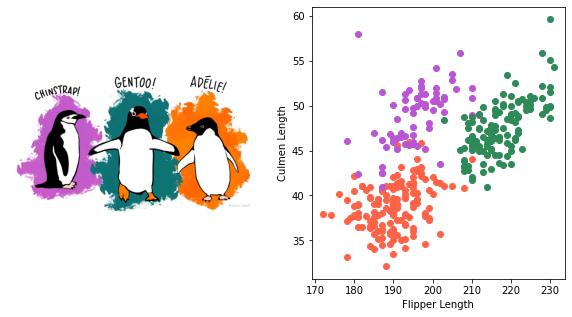

In [2]:
txt_labels = np.unique(df['Species'])
lbl = txt_labels[0]
fig,ax = plt.subplots(1,2,figsize=(10,5))
df_data = [None]*len(txt_labels)
img = mpimg.imread('./img/lter_penguins.png')
ax[0].imshow(img)
ax[0].axis('off')
color = ['tomato','mediumorchid','seagreen','aqua','black','magenta']
for i,lbl in enumerate(txt_labels):
    df_data[i] = df[df['Species'] ==  lbl]
#     print(df_data[i].columns)
    ax[1].scatter(df_data[i]['Flipper Length (mm)'],df_data[i]['Culmen Length (mm)'],color=color[i])
# ax[1].axis('off')
ax[1].set_xlabel('Flipper Length');
ax[1].set_ylabel('Culmen Length');

In [3]:
## Number of classes
K = 3#len(txt_labels)

flp_len = np.mean(df['Flipper Length (mm)'])
clm_len = np.mean(df['Culmen Length (mm)'])

df = df[df['Flipper Length (mm)'].notna()]
df = df[df['Culmen Length (mm)'].notna()]
data = np.matrix(np.c_[df['Flipper Length (mm)'],df['Culmen Length (mm)']].T)
# print(data)

x_mean = np.array([flp_len,clm_len])
d = data - np.reshape(x_mean,(2,1))
cov = np.matmul(d,d.T)/float(data.shape[1])
## Init
pi_init = [1/float(K) for i in range(K)]#[float(df_i.shape[0])/float(df.shape[0]) for df_i in df_data]
mu_init = [np.ravel(data[:,k]) for k in range(K)]
# sigma_init = [np.eye(x_mean.shape[0]) for k in range(K)]
sigma_init = [cov for k in range(K)]

In [4]:
def E_Step(X,pi,mu,sigma):
    gamma = np.zeros((X.shape[1],K))
    for n in range(X.shape[1]):
        tot = 0.0
        for k in range(K):
            gamma[n,k] = pi[k]*gaussian.pdf(X[:,n].T,mean=mu[k],cov=sigma[k])
            tot = tot + gamma[n][k]
        gamma[n,:] = gamma[n,:]/tot
    return gamma

def M_step(X,gamma):
    Nk = [0 for i in range(K)]
    pi = [0 for i in range(K)]
    for k in range(K):
        Nk[k] = np.sum(gamma[:,k])
        pi[k] = Nk[k]/float(X.shape[1])
    mu_mat = np.matmul(X,gamma)/Nk
    mu = []
    for k in range(K):
        mu.append(np.array([mu_mat[0,k],mu_mat[1,k]]))
    sigma = [np.zeros((2,2)) for i in range(K)]
    for k in range(K):
        for n in range(X.shape[1]):
            del_x = X[:,n] - np.reshape(mu[k],(X.shape[0],1))
            cov = np.matmul(del_x,del_x.T)
            sigma[k] = sigma[k] + gamma[n,k]/Nk[k]*cov
    
    return mu,sigma,pi

def getLogLikelihood(X,pi,mu,sigma):
    logLikelihood = 0
    for n in range(X.shape[1]):
        prob = 0
        for k in range(K):
            if np.linalg.det(sigma[k]) < 1E-6:
                print(sigma[k])
                continue
            prob = prob + pi[k]*gaussian.pdf(X[:,n].T,mean=mu[k].T,cov=sigma[k])
        logLikelihood = logLikelihood + np.log(prob)
    return logLikelihood

def EM(X,pi0,mu0,sigma0,iter_max = 250,tol=1E-6):
    pi_curr = pi0
    mu_curr = mu0
    sigma_curr = sigma0
    iter = 0
    post_prob = []
    pi = pi0.copy()
    mu = mu0.copy()
    sigma = sigma0.copy()
    while iter < iter_max:
        max_del = np.finfo('f').min
        iter = iter + 1
        gamma = E_Step(X,pi,mu,sigma)
        mu1,sigma1,pi1 = M_step(X,gamma)
#         print(pi)
#         print(mu)
#         print(sigma)
        prob = 0
        for k in range(len(mu)):
            del_mu  = np.max(np.abs(mu[k]-mu1[k]))
            del_pi  = np.max(np.abs(pi[k]-pi1[k]))
            del_sig = np.max(np.max(np.abs(sigma[k]-sigma1[k])))
            max_del = max(max_del,max(del_mu,max(del_pi,del_sig)))
        pi = pi1.copy()
        mu = mu1.copy()
        sigma = sigma1.copy()
        pi_curr = pi
        mu_curr = mu
        sigma_curr = sigma
        post_prob.append(getLogLikelihood(X,pi,mu,sigma))
#         print(iter,max_del)
        if (max_del <= tol):
            print("Converged after Iteration: " + str(iter))
            break
    
    return mu,sigma,pi,post_prob

def confidence_ellipse(ax, mu, cov, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    cov : Covariance matrix
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
#     if cov != cov.T:
#         raise ValueError("Not a valid covariance matrix")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mu[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mu[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [5]:
mu,sigma,pi,post_prob = EM(data,pi_init,mu_init,sigma_init)

Converged after Iteration: 110


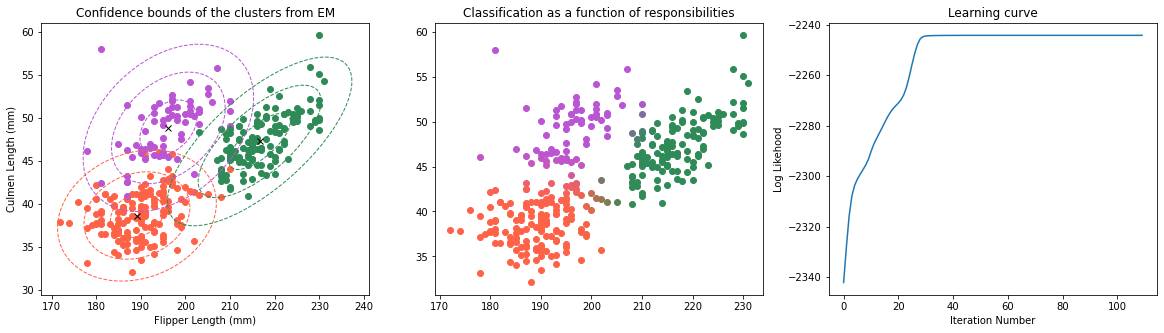

In [6]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
gamma = E_Step(data,pi,mu,sigma)
for n in range(data.shape[1]):
    rgb = np.array([0,0,0])
    for k in range(K):
        rgb = rgb+gamma[n,k]*np.array(mcolors.to_rgb(color[k]))
    ax[1].scatter(data[0,n],data[1,n],color=rgb)
ax[1].set_title('Classification as a function of responsibilities')
for k in range(K):
    if k < 3:
        ax[0].scatter(df_data[k]['Flipper Length (mm)'],df_data[k]['Culmen Length (mm)'],color=color[k])
    ax[0].plot(mu[k][0],mu[k][1],'kx')
    for i in range(3):
        confidence_ellipse(ax[0],mu[k],sigma[k],i+1,edgecolor=color[k],linestyle='dashed')
        
ax[0].set_title('Confidence bounds of the clusters from EM')
ax[0].set_xlabel('Flipper Length (mm)');
ax[0].set_ylabel('Culmen Length (mm)');

ax[2].plot(range(len(post_prob)),post_prob);
ax[2].set_title('Learning curve');
ax[2].set_ylabel('Log Likehood');
ax[2].set_xlabel('Iteration Number');

## References
[1]: Bishop, Christopher M. 2006. Pattern Recognition and Machine Learning. Springer.

[2]: M. P. Deisenroth, A. A. Faisal, and C. S. Ong, 2021. https://mml-book.com 

[3]: Refer to https://statisticaloddsandends.wordpress.com/2018/05/24/derivative-of-log-det-x/ for an explanation of identity for derivative of log of a matrix determinant 

[4]: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/.

[5]: CSV data downloaded from https://github.com/mcnakhaee/palmerpenguins

[6]: Code for plotting confidence ellipses from https://matplotlib.org/3.1.0/gallery/statistics/confidence_ellipse.html